In [ ]:
import numpy as np
import pandas as pd
import math
import random as rd

# Untuk Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Read & Explore Data

In [ ]:
!gdown "1i6otF9UgGqG3ZBt1aH8ebrTGC7la_EKJ"

Downloading...
From: https://drive.google.com/uc?id=1i6otF9UgGqG3ZBt1aH8ebrTGC7la_EKJ
To: /content/traintest.xlsx
100% 17.7k/17.7k [00:00<00:00, 26.9MB/s]


In [ ]:
df = pd.read_excel("traintest.xlsx")
df

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


In [ ]:
df.describe()

,id,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,52.462838,62.881757,4.111486,0.736486
std,85.592056,10.896367,3.233753,7.291816,0.441285
min,1.000000,30.000000,58.000000,0.000000,0.000000
25%,74.750000,44.000000,60.000000,0.000000,0.000000
50%,148.500000,52.000000,63.000000,1.000000,1.000000
75%,222.250000,61.000000,65.250000,5.000000,1.000000
max,296.000000,83.000000,69.000000,52.000000,1.000000


In [ ]:
df.isna().sum()

id    0
x1    0
x2    0
x3    0
y     0
dtype: int64

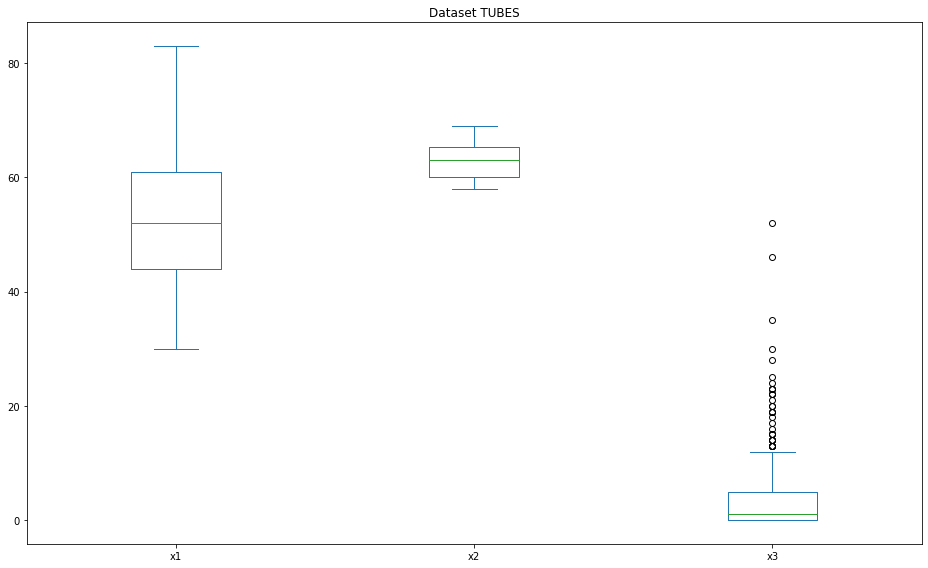

In [ ]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = df[['x1', 'x2', 'x3']].plot(kind='box', title='Dataset TUBES')

# Change df to List

In [ ]:
def dfToList(df):
  listDf = []
  for idx in range(df.shape[0]):
    listRow = []

    # Append
    listRow.append(df["id"][idx])
    listRow.append(df["x1"][idx])
    listRow.append(df["x2"][idx])
    listRow.append(df["x3"][idx])
    listRow.append(df["y"][idx])

    listDf.append(listRow)

  return listDf

# KNN

In [ ]:
def knn(k, dataValidation, listTrain):
  ''' KNN Function '''
  listDistances = []
  euclid, manhattan, minkowski, supremum = [], [], [], []
  for idx in range(len(listTrain)):
    # Calculate Distance with Many Distance Metric
    distEuclid = euclidean_dist(dataValidation, listTrain[idx])
    distManhattan = manhattan_dist(dataValidation, listTrain[idx])
    distMinkowski = minkowski_dist(dataValidation, listTrain[idx])
    distSupremum = supremum_dist(dataValidation, listTrain[idx])

    # Append Distance and Result (y)
    euclid.append([distEuclid, listTrain[idx][4]])
    manhattan.append([distManhattan, listTrain[idx][4]])
    minkowski.append([distMinkowski, listTrain[idx][4]])
    supremum.append([distSupremum, listTrain[idx][4]])

  # Sort by Distance (ascending)
  euclid = sortDistanceList(euclid)
  manhattan = sortDistanceList(manhattan)
  minkowski = sortDistanceList(minkowski)
  supremum = sortDistanceList(supremum)

  # [['Distance Metric', distancePerMetric],
  # ['Distance Metric', distancePerMetric]]

  listDistances = [['Euclidean', euclid[:k]],
                   ['Manhattan', manhattan[:k]],
                   ['Minkowski', minkowski[:k]],
                   ['Supremum', supremum[:k]]]

  return listDistances

In [ ]:
# Distance Metrics Calculation
def euclidean_dist(dataValidation, dataTrain):
  return math.sqrt((dataValidation[1] - dataTrain[1])**2 + (dataValidation[2] - dataTrain[2])**2 + (dataValidation[3] - dataTrain[3])**2)

def manhattan_dist(dataValidation, dataTrain):
  return abs(dataValidation[1] - abs(dataTrain[1])) + abs(dataValidation[2] - dataTrain[2]) + abs(dataValidation[3] - dataTrain[3])

def minkowski_dist(dataValidation, dataTrain, h=1.5):
  dist = abs(dataValidation[1] - abs(dataTrain[1]))**h + abs(dataValidation[2] - dataTrain[2])**h + abs(dataValidation[3] - dataTrain[3])**h
  return dist ** 1/h

def supremum_dist(dataValidation, dataTrain):
  dist = [abs(dataValidation[1] - abs(dataTrain[1])), abs(dataValidation[2] - dataTrain[2]), abs(dataValidation[3] - dataTrain[3])]
  return max(dist)

In [ ]:
def vote(sortedDistanceList):
  ''' Vote Neighbor Majority in range of k '''
  count1 = 0
  count2 = 0

  for dist in sortedDistanceList:
    if dist[1] == 1:
      count1 += 1
    else:
      count2 += 1

  if count1 > count2:
    return 1

  return 0

In [ ]:
def sortDistanceList(distanceList):
  ''' Sort Distance List (ascending) '''
  distanceList.sort(key = lambda x: x[0])
  return distanceList

# K Cross Validation

In [ ]:
def crossValSplit(dataset, numFolds):
  ''' Fungsi implementasi k-fold validation '''
  dataSplit = list()
  dataCopy = list(dataset)
  foldSize = int(len(dataset) / numFolds)
  for _ in range(numFolds):
      fold = list()
      while len(fold) < foldSize:
          index = rd.randrange(len(dataCopy))
          fold.append(dataCopy.pop(index))
      dataSplit.append(fold)
  return dataSplit

In [ ]:
def combineTrainList(kFoldList, validationListIdx):
  ''' Combining Folded Training Data List '''
  trainList = []
  for i in range(len(kFoldList)):
    if i != validationListIdx:
      trainList.append(kFoldList[i])

  trainList = [secondSublist for sublist in trainList for secondSublist in sublist]
  return trainList

def checkKFold(datasetValidationData, resultValidationData):
  ''' Checking errors of knn result '''
  count = 0
  for i in range(len(datasetValidationData)):
    if resultValidationData[i][4] == datasetValidationData[i][4]:
      count += 1
  accuracy = count / len(datasetValidationData)
  return 1 - accuracy

## Get Results

In [ ]:
def makeResult(k, validationData, trainData):
  ''' Make result per validation data row '''
  dist = knn(k, validationData, trainData)

  # Hasil knn
  # [['Distance Metric', distancePerMetric],
  # ['Distance Metric', distancePerMetric]]

  # Make result idx 0-3 (id, x1, x2, x3)
  resultValEuclid, resultValManhattan, resultValMinkowski, resultValSupremum = [validationData[i] for i in range(4)], [validationData[i] for i in range(4)], [validationData[i] for i in range(4)], [validationData[i] for i in range(4)]

  # Result (y) idx 4
  resultValEuclid.append(vote(dist[0][1]))
  resultValManhattan.append(vote(dist[1][1]))
  resultValMinkowski.append(vote(dist[2][1]))
  resultValSupremum.append(vote(dist[3][1]))

  return resultValEuclid, resultValManhattan, resultValMinkowski, resultValSupremum

In [ ]:
def getBestFold(kFoldList, k=5):
  ''' Get best candidate for training and validation data '''
  distMetrics = ["Euclidean", "Manhattan", "Minkowski", "Supremum"]
  errorListEuclid, errorListManhatt, errorListMinkow, errorListSupre = [], [], [], []
  for i in range(len(kFoldList)):
    print("Data Validasi ada di Fold ke-" + str(i))
    trainList = combineTrainList(kFoldList, i)
    rowValEuclid, rowValManhattan, rowValMinkowski, rowValSupremum = [], [], [], []
    for valData in kFoldList[i]: # kFoldList[i] -> Data Validation yang dipakai
      resultValEuclid, resultValManhattan, resultValMinkowski, resultValSupremum = makeResult(k, valData, trainList)

      # Make row
      rowValEuclid.append(resultValEuclid)
      rowValManhattan.append(resultValManhattan)
      rowValMinkowski.append(resultValMinkowski)
      rowValSupremum.append(resultValSupremum)

    # Print Real Validation Data and KNN Result
    print("Validation     :", kFoldList[i])
    print("Result (euclid):", rowValEuclid)
    print("Result (manhat):", rowValManhattan)
    print("Result (minkow):", rowValMinkowski)
    print("Result (suprem):", rowValSupremum)
    print()

    # Check result accuracy based on validation data used (fold[i])
    errorListEuclid.append(checkKFold(kFoldList[i], rowValEuclid))
    errorListManhatt.append(checkKFold(kFoldList[i], rowValManhattan))
    errorListMinkow.append(checkKFold(kFoldList[i], rowValMinkowski))
    errorListSupre.append(checkKFold(kFoldList[i], rowValSupremum))

  # Error List
  errors = [['Euclid', errorListEuclid],
            ['Manhattan', errorListManhatt],
            ['Minkowski', errorListMinkow],
            ['Supremum', errorListSupre]]

  # Print lowest error per metric based on validation data used (fold[i])
  bestIndexes = []
  for metric in range(len(distMetrics)):
    # Minimum Errors:
    errorMin = min(errors[metric][1])

    print(f"Errors ({distMetrics[metric]}):", errors[metric][1])
    print(f"Smallest Error Fold ({distMetrics[metric]}):", errors[metric][1].index(errorMin))

    # [EuclidIndex, ManhatIndex, MinkowIndex, SupreIndex]
    bestIndexes.append(errors[metric][1].index(errorMin))
  print()

  # Return Best Train List and Validation List Index for every distance metric
  return bestIndexes

In [ ]:
def getErrorPerK(idxBestValid, foldedList): # For KNN
  errorListAll = []
  for k in range(1, 11):
    trainList = combineTrainList(foldedList, idxBestValid)
    rowValEuclid, rowValManhattan, rowValMinkowski, rowValSupremum = [], [], [], []
    errorListEuclid, errorListManhatt, errorListMinkow, errorListSupre = [], [], [], []
    for valData in foldedList[idxBestValid]: # foldedList[i] -> Data Validation yang dipakai
      resultValEuclid, resultValManhattan, resultValMinkowski, resultValSupremum = makeResult(k, valData, trainList)

      # Make row
      rowValEuclid.append(resultValEuclid)
      rowValManhattan.append(resultValManhattan)
      rowValMinkowski.append(resultValMinkowski)
      rowValSupremum.append(resultValSupremum)

    # Print Real Validation Data and KNN Result
    print(f"k: {k}")
    print("Validation     :", foldedList[idxBestValid])
    print("Result (euclid):", rowValEuclid)
    print("Result (manhat):", rowValManhattan)
    print("Result (minkow):", rowValMinkowski)
    print("Result (suprem):", rowValSupremum)
    print()

    # Check result accuracy based on validation data used (fold[i])
    errorListEuclid = checkKFold(foldedList[idxBestValid], rowValEuclid)
    errorListManhatt = checkKFold(foldedList[idxBestValid], rowValManhattan)
    errorListMinkow = checkKFold(foldedList[idxBestValid], rowValMinkowski)
    errorListSupre = checkKFold(foldedList[idxBestValid], rowValSupremum)

    errorLists = [k, errorListEuclid, errorListManhatt, errorListMinkow, errorListSupre]
    errorListAll.append(errorLists)

  return errorListAll

## Elbow Plot

In [ ]:
def show_elbow_plot(listError):
  # Bentuk List: [[k, errorEuclid, errorManhattan, errorMinkowski, errorSupremum],
  #              [k, errorEuclid, errorManhattan, errorMinkowski, errorSupremum], ...]
  x = []
  y1 = []
  y2 = []
  y3 = []
  y4 = []
  for i in range(len(listError)):
    x.append(listError[i][0])
    y1.append(listError[i][1])
    y2.append(listError[i][2])
    y3.append(listError[i][3])
    y4.append(listError[i][4])

  plt.plot(x, y1, label = "Euclidean")
  plt.plot(x, y2, label = "Manhattan")
  plt.plot(x, y3, label = "Minkowski")
  plt.plot(x, y4, label = "Supremum")

  print("Euclid", y1)
  print("Manhattan",y2)
  print("Minkowski",y3)
  print("Supremum",y4)

  # X Axis
  plt.xlabel('k')
  # Y Axis
  plt.ylabel('errors')
  # Graph Title
  plt.title('Error berdasarkan k')

  # Show Legend
  plt.legend()

  # Show Plot
  plt.show()

# Main

In [ ]:
# Convert to List
dfList = dfToList(df)

# Split Train Data into K Portions using K-Fold
kFoldDf = crossValSplit(dfList, 5)

In [ ]:
# Get Best Fold
bestValidIdx = getBestFold(kFoldDf)

Data Validasi ada di Fold ke-0
Validation     : [[169, 61, 59, 0, 1], [192, 52, 60, 5, 1], [227, 57, 61, 0, 1], [102, 55, 58, 0, 1], [83, 31, 59, 2, 1], [128, 60, 61, 1, 1], [233, 57, 62, 0, 1], [117, 47, 61, 0, 1], [103, 44, 67, 16, 1], [211, 49, 63, 0, 0], [147, 72, 64, 0, 1], [282, 40, 58, 2, 1], [91, 61, 59, 0, 1], [258, 51, 66, 1, 1], [51, 53, 60, 9, 0], [146, 42, 65, 0, 1], [139, 42, 58, 0, 1], [123, 44, 61, 0, 1], [96, 39, 63, 4, 1], [269, 70, 63, 0, 1], [164, 43, 64, 3, 1], [56, 54, 63, 19, 1], [144, 62, 59, 13, 0], [32, 45, 67, 1, 1], [172, 48, 66, 0, 1], [34, 61, 65, 8, 1], [94, 59, 64, 0, 1], [167, 41, 69, 8, 1], [223, 34, 66, 9, 0], [248, 60, 61, 25, 1], [267, 58, 61, 2, 1], [292, 59, 64, 1, 1], [242, 59, 64, 7, 1], [109, 58, 58, 0, 1], [283, 52, 63, 4, 1], [25, 51, 64, 7, 1], [54, 65, 58, 0, 0], [268, 40, 65, 0, 1], [143, 63, 66, 0, 1], [243, 53, 63, 24, 0], [60, 67, 64, 8, 0], [140, 74, 65, 3, 0], [49, 57, 62, 14, 0], [58, 41, 59, 0, 1], [129, 48, 58, 11, 0], [3, 65, 62, 

## Mengecek Persebaran Data

In [ ]:
# Data Train
listTrain = combineTrainList(kFoldDf, 1)

# Calling DataFrame constructor after zipping
# both lists, with columns specified
dfTrain = pd.DataFrame(listTrain, columns =['id', 'x1', 'x2', 'x3', 'y'])
dfTrain

,id,x1,x2,x3,y
0,282,40,58,2,1
1,134,58,61,1,1
2,110,41,65,0,1
3,175,65,64,0,1
4,236,61,59,0,1
...,...,...,...,...,...
231,4,34,60,0,1
232,283,52,63,4,1
233,263,42,59,0,0
234,267,58,61,2,1


In [ ]:
# Data Validation
listValid = kFoldDf[1]

dfValid = pd.DataFrame(listValid, columns =['id', 'x1', 'x2', 'x3', 'y'])
dfValid

,id,x1,x2,x3,y
0,111,38,67,5,1
1,165,56,66,1,1
2,101,54,62,0,1
3,241,76,67,0,1
4,287,56,67,0,1
5,17,49,61,1,1
6,259,61,62,5,0
7,291,50,61,6,1
8,171,50,58,1,1
9,210,45,67,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


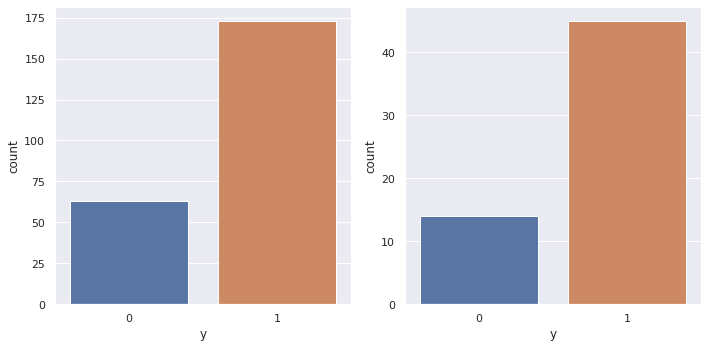

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(dfTrain['y'], ax=axs[0])
sns.countplot(dfValid['y'], ax=axs[1])

## Mencari K yang terbaik

In [ ]:
# Elbow Method (search for best k)
errorList = getErrorPerK(1, kFoldDf)

print("------------")
print("Error List: ")
errorList

k: 1
Validation     : [[111, 38, 67, 5, 1], [165, 56, 66, 1, 1], [101, 54, 62, 0, 1], [241, 76, 67, 0, 1], [287, 56, 67, 0, 1], [17, 49, 61, 1, 1], [259, 61, 62, 5, 0], [291, 50, 61, 6, 1], [171, 50, 58, 1, 1], [210, 45, 67, 1, 0], [178, 52, 66, 4, 0], [38, 62, 65, 19, 0], [209, 48, 58, 11, 0], [181, 48, 64, 0, 1], [184, 47, 67, 0, 1], [86, 55, 69, 3, 1], [26, 41, 60, 23, 0], [188, 51, 65, 0, 1], [254, 62, 66, 0, 1], [66, 33, 60, 0, 1], [44, 49, 62, 0, 1], [177, 42, 59, 2, 1], [196, 65, 64, 0, 1], [76, 61, 68, 0, 1], [253, 49, 60, 1, 1], [149, 67, 66, 0, 1], [290, 64, 61, 0, 1], [70, 64, 66, 0, 1], [174, 38, 60, 0, 1], [99, 51, 59, 3, 0], [153, 65, 61, 2, 0], [77, 50, 59, 0, 1], [208, 45, 66, 0, 0], [23, 36, 60, 1, 1], [246, 46, 62, 0, 1], [64, 46, 62, 5, 0], [278, 41, 65, 0, 1], [13, 69, 60, 0, 1], [22, 46, 63, 0, 1], [85, 65, 59, 2, 1], [154, 49, 66, 0, 1], [31, 70, 67, 0, 1], [224, 72, 63, 0, 0], [234, 39, 59, 2, 1], [47, 52, 68, 0, 1], [289, 47, 60, 4, 1], [90, 37, 59, 6, 1], [173,

[[1,
  0.2542372881355932,
  0.2542372881355932,
  0.2542372881355932,
  0.30508474576271183],
 [2,
  0.30508474576271183,
  0.30508474576271183,
  0.30508474576271183,
  0.27118644067796616],
 [3,
  0.1694915254237288,
  0.1694915254237288,
  0.15254237288135597,
  0.2033898305084746],
 [4,
  0.15254237288135597,
  0.1694915254237288,
  0.13559322033898302,
  0.2033898305084746],
 [5,
  0.1694915254237288,
  0.18644067796610164,
  0.1694915254237288,
  0.1694915254237288],
 [6,
  0.1694915254237288,
  0.2033898305084746,
  0.18644067796610164,
  0.2033898305084746],
 [7,
  0.18644067796610164,
  0.13559322033898302,
  0.2033898305084746,
  0.1694915254237288],
 [8,
  0.18644067796610164,
  0.15254237288135597,
  0.15254237288135597,
  0.2033898305084746],
 [9,
  0.18644067796610164,
  0.2033898305084746,
  0.18644067796610164,
  0.1694915254237288],
 [10,
  0.18644067796610164,
  0.2033898305084746,
  0.18644067796610164,
  0.1694915254237288]]

Euclid [0.2542372881355932, 0.30508474576271183, 0.1694915254237288, 0.15254237288135597, 0.1694915254237288, 0.1694915254237288, 0.18644067796610164, 0.18644067796610164, 0.18644067796610164, 0.18644067796610164]
Manhattan [0.2542372881355932, 0.30508474576271183, 0.1694915254237288, 0.1694915254237288, 0.18644067796610164, 0.2033898305084746, 0.13559322033898302, 0.15254237288135597, 0.2033898305084746, 0.2033898305084746]
Minkowski [0.2542372881355932, 0.30508474576271183, 0.15254237288135597, 0.13559322033898302, 0.1694915254237288, 0.18644067796610164, 0.2033898305084746, 0.15254237288135597, 0.18644067796610164, 0.18644067796610164]
Supremum [0.30508474576271183, 0.27118644067796616, 0.2033898305084746, 0.2033898305084746, 0.1694915254237288, 0.2033898305084746, 0.1694915254237288, 0.2033898305084746, 0.1694915254237288, 0.1694915254237288]


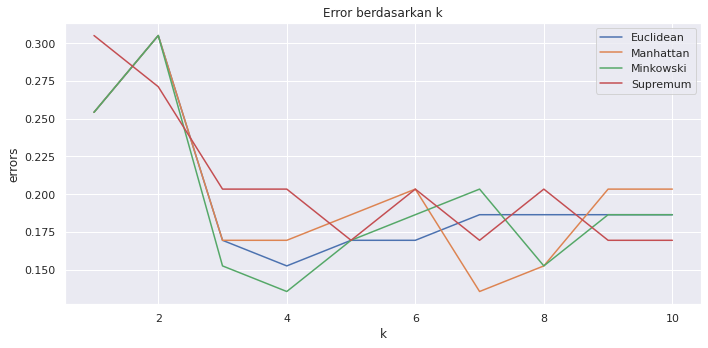

In [ ]:
# Menentukan K dengan Elbow Method
show_elbow_plot(errorList)

## Implementasi KNN ke Testing Data

In [ ]:
testDf = pd.read_excel('traintest.xlsx', 'test')
testData = dfToList(testDf)

In [ ]:
k = 4 # Ambil k dari elbow

rowValEuclid, rowValManhattan, rowValMinkowski, rowValSupremum = [], [], [], []
for data in testData: # foldedList[i] -> Data Validation yang dipakai
  resultValEuclid, resultValManhattan, resultValMinkowski, resultValSupremum = makeResult(k, data, dfList)

  # Make row
  rowValEuclid.append(resultValEuclid)
  rowValManhattan.append(resultValManhattan)
  rowValMinkowski.append(resultValMinkowski)
  rowValSupremum.append(resultValSupremum)

outputWithEuclid = pd.DataFrame(rowValEuclid, columns =['id', 'x1', 'x2', 'x3', 'y'])
outputWithManhattan = pd.DataFrame(rowValManhattan, columns =['id', 'x1', 'x2', 'x3', 'y'])
outputWithMinkowski = pd.DataFrame(rowValMinkowski, columns =['id', 'x1', 'x2', 'x3', 'y'])
outputWithSupremum = pd.DataFrame(rowValSupremum, columns =['id', 'x1', 'x2', 'x3', 'y'])

In [ ]:
outputWithEuclid

,id,x1,x2,x3,y
0,297,43,59,2,1
1,298,67,66,0,1
2,299,58,60,3,1
3,300,49,63,3,1
4,301,45,60,0,1
5,302,54,58,1,1
6,303,56,66,3,1
7,304,42,69,1,0
8,305,50,59,2,1
9,306,59,60,0,1


In [ ]:
outputWithManhattan

,id,x1,x2,x3,y
0,297,43,59,2,1
1,298,67,66,0,1
2,299,58,60,3,1
3,300,49,63,3,1
4,301,45,60,0,1
5,302,54,58,1,1
6,303,56,66,3,1
7,304,42,69,1,1
8,305,50,59,2,0
9,306,59,60,0,1


In [ ]:
outputWithMinkowski

,id,x1,x2,x3,y
0,297,43,59,2,1
1,298,67,66,0,1
2,299,58,60,3,1
3,300,49,63,3,1
4,301,45,60,0,1
5,302,54,58,1,1
6,303,56,66,3,1
7,304,42,69,1,0
8,305,50,59,2,1
9,306,59,60,0,1


In [ ]:
outputWithSupremum

,id,x1,x2,x3,y
0,297,43,59,2,1
1,298,67,66,0,1
2,299,58,60,3,1
3,300,49,63,3,1
4,301,45,60,0,1
5,302,54,58,1,1
6,303,56,66,3,1
7,304,42,69,1,1
8,305,50,59,2,1
9,306,59,60,0,1


In [ ]:
outputWithEuclid.to_excel("outputEuclid.xlsx", sheet_name="euclid",index=False)
outputWithManhattan.to_excel("outputManhattan.xlsx", sheet_name="supremum",index=False)
outputWithMinkowski.to_excel("outputMinkowski.xlsx", sheet_name="minkowski",index=False)
outputWithSupremum.to_excel("outputSupremum.xlsx", sheet_name="supremum",index=False)